In [0]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [0]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier,NearestNeighbors
from sklearn.model_selection import train_test_split,cross_val_score
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [16]:
file = '/content/drive/My Drive/PGAIML/26-28 July 2019/Lab/External/Iris.csv'
file
dframe = pd.read_csv(file)
randomRows = dframe.sample(n=10, random_state=2)
randomRows

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
6,4.6,3.4,1.4,0.3,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
113,5.7,2.5,5.0,2.0,Iris-virginica
12,4.8,3.0,1.4,0.1,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
129,7.2,3.0,5.8,1.6,Iris-virginica
25,5.0,3.0,1.6,0.2,Iris-setosa
108,6.7,2.5,5.8,1.8,Iris-virginica
128,6.4,2.8,5.6,2.1,Iris-virginica
45,4.8,3.0,1.4,0.3,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [17]:
#There is no missing values
dframe.isna().any()

Sepal Length (in cm)    False
Sepal Width in (cm)     False
Petal length (in cm)    False
Petal width (in cm)     False
Class                   False
dtype: bool

There is no missing value in the dataset, so we dont need to replace anything

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [18]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [19]:
dframe.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
print(dframe['Class'].unique())

print(dframe.groupby('Class').size())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [24]:
dframe['Class'] = dframe.Class.astype('category')
dframe['Class'] = dframe['Class'].cat.codes
dframe.sample(n=10, random_state=2)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
6,4.6,3.4,1.4,0.3,0
3,4.6,3.1,1.5,0.2,0
113,5.7,2.5,5.0,2.0,2
12,4.8,3.0,1.4,0.1,0
24,4.8,3.4,1.9,0.2,0
129,7.2,3.0,5.8,1.6,2
25,5.0,3.0,1.6,0.2,0
108,6.7,2.5,5.8,1.8,2
128,6.4,2.8,5.6,2.1,2
45,4.8,3.0,1.4,0.3,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [29]:
import seaborn as sns
corr = dframe.corr()
corr

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


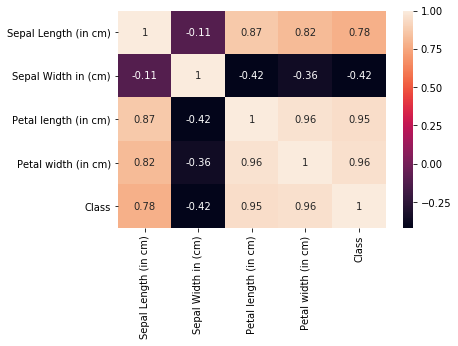

In [33]:
sns.heatmap(corr,annot=True)

**There is no such variable such that has corelation with target variable in the given range of -0.1 to 0.1** 

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [52]:
dframe.var()
print(dframe.var())
low_var = np.where((dframe.var()<0.1))
low_var

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64


(array([], dtype=int64),)

**There are no variables that are having no variance or almost zero variance i.e (variance<0.1),. No need to drop any variable**

## Question 6

*Plot the scatter matrix for all the variables.*

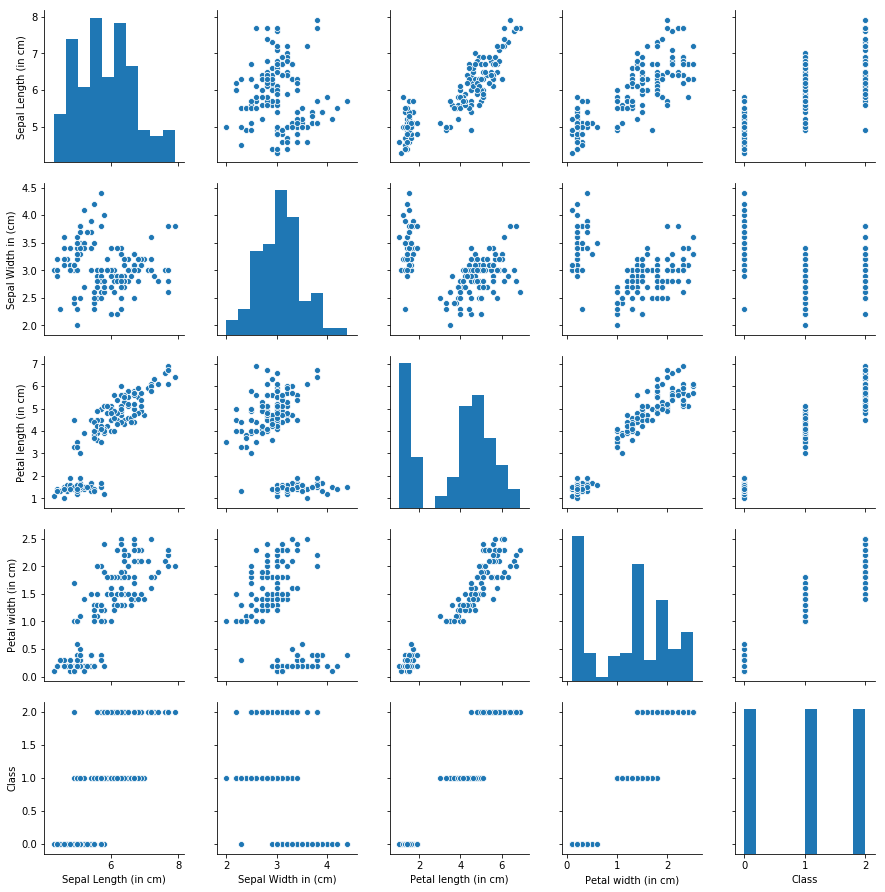

In [58]:
sns.pairplot(dframe)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [71]:
from sklearn.model_selection import train_test_split
Y = dframe['Class']
X = dframe.drop('Class',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [72]:
counter = [3,5,9]
for k in counter:
    NNH = KNeighborsClassifier(n_neighbors = k , weights = 'uniform', metric = 'euclidean')
    NNH.fit(X_train, Y_train)
    Y_pred = NNH.predict(X_test)
    print(accuracy_score(Y_test, Y_pred))

0.9666666666666667
0.9666666666666667
1.0


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [80]:
counter = np.arange(1,20,2)
MSE_arr=[]
for k in counter:
    NNH = KNeighborsClassifier(n_neighbors = k , weights = 'uniform', metric = 'euclidean')
    NNH.fit(X_train, Y_train)
    Y_pred = NNH.predict(X_test)
    MSE = 1-accuracy_score(Y_test, Y_pred)
    MSE_arr.append(MSE)
    print(k, MSE)

optimal_kvalue = counter[MSE_arr.index(min(MSE_arr))]
print(optimal_kvalue)

1 0.033333333333333326
3 0.033333333333333326
5 0.033333333333333326
7 0.033333333333333326
9 0.0
11 0.033333333333333326
13 0.0
15 0.0
17 0.06666666666666665
19 0.033333333333333326
9


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

[0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.0, 0.033333333333333326, 0.0, 0.0, 0.06666666666666665, 0.033333333333333326]


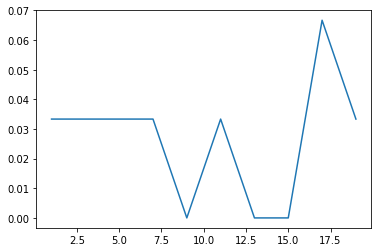

In [81]:
import matplotlib.pyplot as plt
MSE_arr=[]
counter = np.arange(1,20,2)
for k in counter:
    NNH = KNeighborsClassifier(n_neighbors = k , weights = 'uniform', metric = 'euclidean')
    NNH.fit(X_train, Y_train)
    Y_pred = NNH.predict(X_test)
    MSE = 1-accuracy_score(Y_test, Y_pred)
    MSE_arr.append(MSE)
print(MSE_arr)
plt.plot(counter,MSE_arr)

Text(0, 0.5, 'MSE')

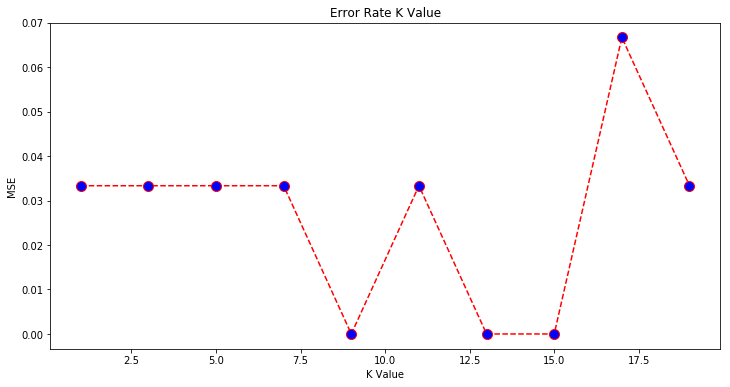

In [84]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1,20,2), MSE_arr, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('MSE')

# Naive Bayes with Iris Data

In [0]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA


### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [88]:
file = '/content/drive/My Drive/PGAIML/26-28 July 2019/Lab/External/Iris.csv'
file
df = pd.read_csv(file)
df['Class']=df.Class.astype('category')
df['Class'] = df['Class'].cat.codes
df

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [90]:
#Check the dataset

y = df['Class']
X = df.drop('Class',axis=1)
print(y.head(5))
print(X.head())

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int8
   Sepal Length (in cm)  ...  Petal width (in cm)
0                   5.1  ...                  0.2
1                   4.9  ...                  0.2
2                   4.7  ...                  0.2
3                   4.6  ...                  0.2
4                   5.0  ...                  0.2

[5 rows x 4 columns]


# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

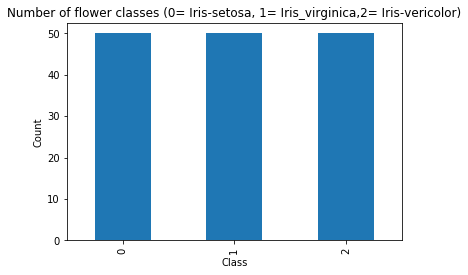

In [91]:
plt.figure()
pd.Series(df['Class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Class")
plt.title('Number of flower classes (0= Iris-setosa, 1= Iris_virginica,2= Iris-vericolor)');

In [0]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [0]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [92]:
corr_new = df.corr()
corr_new

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


### Split data in Training and test set in 80:20.

In [0]:
from sklearn.model_selection import train_test_split
X=df.drop(['Class'], axis=1)
Y=df['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20) 

### Question 13 
Do Feature Scaling 

In [0]:
# Use StandardScaler or similar methods

In [0]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

### Question 14 
Train and Fit NaiveBayes Model

In [0]:
#Fit the model
#train
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, Y_train)

In [98]:
#Predict
Y_pred_GNB=clf_GNB.predict(X_test)
Y_pred_GNB

array([1, 2, 0, 0, 1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1,
       1, 2, 1, 2, 1, 2, 1, 0], dtype=int8)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [99]:
# show Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred_GNB)
print(confusion_matrix)

[[ 9  0  0]
 [ 0 12  0]
 [ 0  0  9]]


In [100]:
# show accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred_GNB)

1.0

In [102]:
#Show precision and Recall metrics
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_GNB)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

